# Projekt końcowy Data Science
### Dorota Gawrońska-Popa
## Klasteryzacja danych 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Klasteryzacja bedzie robiona na zbiorze data_dummies

In [2]:
# wczytuje dane z poprzedniej części
data_dummies = pd.read_csv('data_dummies.csv')

In [3]:
data_dummies.head()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,5000.0,5000.0,1,10.65,162.87,1,10,24000.0,2011,...,0,0,0,0,0,0,0,0,0,0
1,1,2500.0,2500.0,2,15.27,59.83,2,1,30000.0,2011,...,0,0,0,0,0,0,0,0,0,0
2,2,2400.0,2400.0,1,15.96,84.33,3,10,12252.0,2011,...,0,0,0,0,0,0,0,0,0,0
3,3,10000.0,10000.0,1,13.49,339.31,4,10,49200.0,2011,...,0,0,0,0,0,0,0,0,0,0
4,4,3000.0,3000.0,2,12.69,67.79,5,1,80000.0,2011,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_dummies.drop(['loan_status', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
data_dummies.shape

(42535, 97)

In [6]:
data_dummies.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,1,10.65,162.87,1,10,24000.0,2011,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2,15.27,59.83,2,1,30000.0,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,1,15.96,84.33,3,10,12252.0,2011,8.72,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,1,13.49,339.31,4,10,49200.0,2011,20.00,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,2,12.69,67.79,5,1,80000.0,2011,17.94,...,0,0,0,0,0,0,0,0,0,0


In [7]:
scaler = StandardScaler()
scaler.fit(data_dummies)
data_dummies_std = scaler.transform(data_dummies)

### Przygotowanie zbioru do grupowania z PCA
- Zmniejszenie liczby wymiarów. 
- Usunięcie wartości ujemnych.
- Usunięcie skośności zmiennych. 
- Usuwanie ouliersów. 
- Skalowanie danych. 

#### Zmniejszenie liczby wymiarów

In [8]:
pca = IncrementalPCA(n_components=2)
data_dummies_pca = pca.fit_transform(data_dummies)
data_pca = pd.DataFrame(data_dummies_pca, columns = ['c1', 'c2'], index = data_dummies.index)

In [9]:
data_pca

,c1,c2
0,-45282.271425,3158.565432
1,-40786.620453,-9829.325366
2,-58279.298352,-6572.469319
3,-20803.384098,-6458.204225
4,11728.517628,10115.675027
...,...,...
42530,108047.180124,-28463.034380
42531,-58942.348408,-9764.908250
42532,38472.583043,-20656.666720
42533,-10916.473014,-13995.292702


In [10]:
colnames = list(data_dummies.columns)
data_pca1 = pd.DataFrame({'c1':pca.components_[0],'c2':pca.components_[1], 'Feature':colnames})

In [11]:
data_pca1

,c1,c2,Feature
0,3.368171e-02,1.186367e-01,loan_amnt
1,3.202302e-02,1.136052e-01,funded_amnt
2,3.275048e-07,1.681826e-06,term
3,3.460200e-06,2.094485e-05,int_rate
4,9.556052e-04,3.336930e-03,installment
...,...,...,...
92,-5.197144e-09,-1.065550e-08,addr_state_VT
93,-1.175526e-08,6.883287e-08,addr_state_WA
94,-1.736147e-08,2.939460e-08,addr_state_WI
95,-1.603709e-08,-1.764391e-08,addr_state_WV


In [12]:
data_pca.agg(['mean','median','std','min','max']).round(2)

,c1,c2
mean,0.00,-0.00
median,-10743.68,-4325.41
std,64499.50,21068.50
min,-68905.31,-694589.37
max,5887602.48,1139657.99


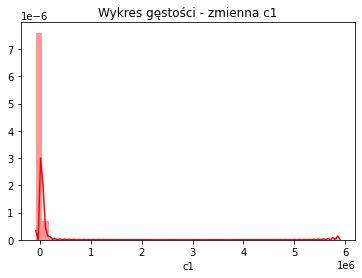

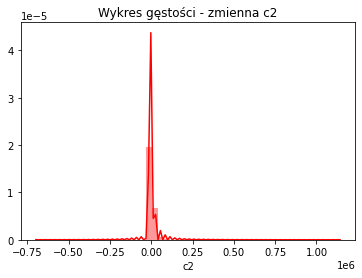

In [13]:
sns.distplot(data_pca.c1, color = 'r').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
sns.distplot(data_pca.c2, color = 'r').set(title = 'Wykres gęstości - zmienna c2')
plt.show()

#### Usuwanie wartości ujemnych, przez dodanie modułu z min najmniejszej wartości i plus 1 

In [14]:
for col in data_pca:
    if data_pca[col].min() <= 0:
        data_pca[col] = data_pca[col] + np.abs(data_pca[col].min())+1

#### Usuwanie skośności 

In [15]:
data_pca = np.log(data_pca)

#### Usuwanie wartości odstających 

In [16]:
q1 = data_pca.quantile(0.25)
q3 = data_pca.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (data_pca[iqr.index] < low_boundary).sum()
num_of_outliers_U = (data_pca[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,
                         'num_of_outliers__lower_boundary':num_of_outliers_L, 
                         'num_of_outliers__upper_boundary':num_of_outliers_U})

In [17]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,9.492173,12.425370,521,409
c2,13.409988,13.483962,188,2574


In [18]:
for row in outliers.iterrows():
    data_pca = data_pca[(data_pca[row[0]] >= row[1]['lower_boundary']) & (data_pca[row[0]] <= row[1]['upper_boundary'])]

In [19]:
scaler = StandardScaler()
scaler.fit(data_pca)
data_pca_std = scaler.transform(data_pca)
data_pca = pd.DataFrame(data=data_pca_std, index=data_pca.index, columns=data_pca.columns)

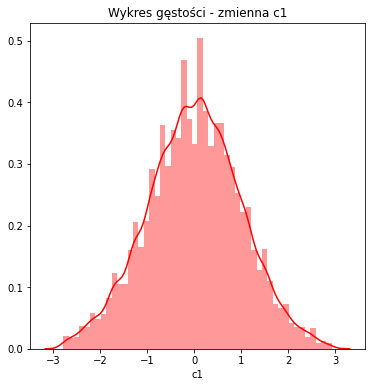

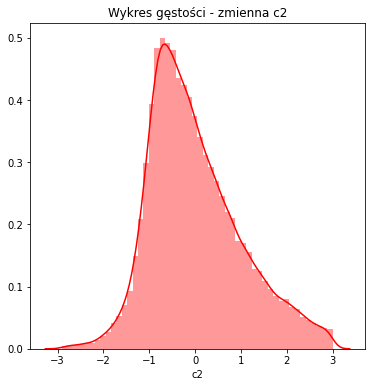

In [20]:
plt.figure(figsize = (6,6))
sns.distplot(data_pca.c1, color = 'r').set(title = 'Wykres gęstości - zmienna c1')
plt.show()
plt.figure(figsize = (6,6))
sns.distplot(data_pca.c2, color = 'r').set(title = 'Wykres gęstości - zmienna c2')
plt.show()

Jako, że hierarchiczna metoda klasteryzacji jest złożona obliczeniowo, ograniczam liczbę obserwacji do 1000. Wcześniej eksportuję plik po pCA do dalszej obróbki w notebooku modelowaniA. 

In [21]:
# ten plik ma 1000 próbek
data_pca = data_pca.sample(1000, random_state = 67)

<Figure size 1440x1440 with 0 Axes>

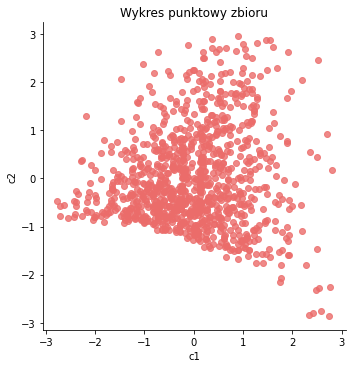

In [22]:
plt.figure(figsize = (20,20))
sns.lmplot('c1', 'c2', data = data_pca, scatter_kws={"color": "#eb6c6a"}, fit_reg=False).set(title = 'Wykres punktowy zbioru')
plt.show()

### Klastrowanie hierarchiczne metodą Warda

#### Metoda łączenia grup Warda w bibliotece sklearn. 

In [23]:
model_skl = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=6).fit(data_pca)

In [24]:
data_pca['Cluster_ID'] = model_skl.labels_

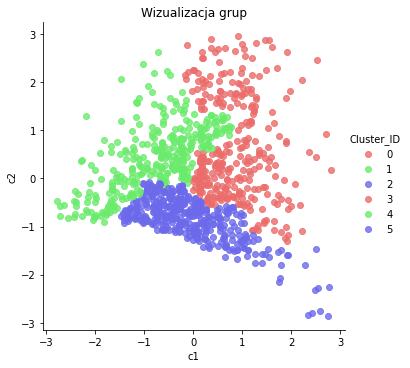

In [25]:
sns.lmplot('c1', 'c2', data = data_pca, hue = 'Cluster_ID', fit_reg=False, palette = ['#eb6c6a', '#6aeb6c', '#6c6aeb']).set(title='Wizualizacja grup')
plt.show()

#### Grupowanie z użyciem biblioteki SciPy

In [26]:
model_sci = linkage(data_pca.iloc[:,0:2], method = 'ward', metric = 'euclidean')

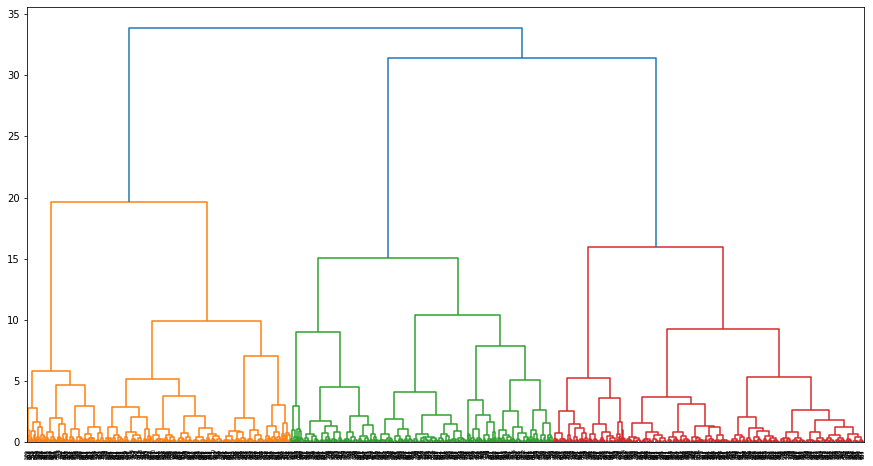

In [27]:
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(model_sci)
plt.show()

Dzielenie obserwacji na grupy według maksymalnej liczby klastrów. 

In [28]:
clusters = fcluster(model_sci, 6, criterion='maxclust')
data_pca['Cluster_ID_2'] = clusters
clusters

array([2, 4, 4, 1, 5, 4, 2, 6, 2, 2, 1, 3, 6, 3, 6, 4, 4, 2, 4, 6, 2, 6,
       4, 5, 4, 6, 6, 1, 2, 6, 5, 2, 5, 4, 4, 6, 3, 5, 4, 2, 6, 3, 3, 5,
       2, 2, 4, 4, 2, 4, 4, 2, 6, 3, 6, 1, 5, 2, 5, 6, 4, 6, 6, 4, 3, 2,
       6, 2, 5, 2, 5, 4, 6, 3, 5, 3, 4, 4, 2, 2, 1, 6, 2, 1, 6, 4, 2, 5,
       2, 2, 3, 3, 6, 4, 5, 6, 6, 4, 6, 6, 2, 2, 2, 6, 4, 6, 2, 3, 6, 6,
       5, 4, 4, 2, 4, 2, 5, 3, 2, 2, 2, 1, 4, 4, 3, 6, 5, 4, 3, 2, 5, 4,
       6, 4, 6, 4, 6, 2, 6, 5, 6, 6, 3, 2, 5, 2, 5, 2, 2, 4, 1, 4, 3, 4,
       3, 6, 1, 5, 5, 3, 1, 2, 4, 6, 2, 6, 4, 4, 3, 6, 4, 2, 1, 4, 5, 6,
       2, 3, 6, 2, 4, 3, 6, 6, 4, 4, 1, 6, 5, 2, 2, 4, 4, 3, 3, 2, 4, 2,
       5, 5, 3, 1, 6, 6, 6, 6, 6, 2, 2, 1, 6, 6, 4, 4, 2, 5, 6, 2, 3, 6,
       5, 6, 4, 4, 2, 2, 2, 5, 1, 2, 6, 6, 1, 6, 3, 6, 4, 4, 5, 4, 2, 1,
       6, 4, 6, 3, 3, 6, 4, 6, 2, 6, 4, 6, 6, 1, 6, 4, 1, 6, 2, 3, 4, 3,
       6, 3, 3, 6, 4, 6, 5, 6, 2, 5, 3, 5, 6, 6, 4, 2, 2, 4, 6, 2, 2, 6,
       5, 4, 2, 5, 3, 5, 3, 6, 1, 4, 2, 6, 3, 4, 4,

<Figure size 1440x1440 with 0 Axes>

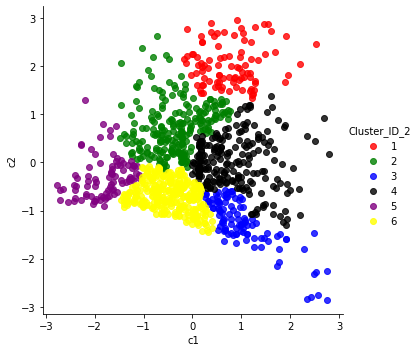

In [29]:
plt.figure(figsize = (20,20))
sns.lmplot('c1', 'c2', data = data_pca, fit_reg=False, hue = 'Cluster_ID_2', palette = ['red', 'green', 'blue', 'black', 'purple', 'yellow'])
plt.show()

W obu metodach są takie same wyniki. 

### DBSCAN
Na pliku data_pca po PCA

In [30]:
clt = DBSCAN(eps=0.5, metric='euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(data_pca)

In [31]:
data_pca['Clasters'] = model.labels_

In [32]:
model.labels_

array([ 0,  1,  1,  2,  3,  1,  0,  4,  0,  0,  2,  5,  4,  5,  4,  1,  1,
        0,  1,  4,  0,  4,  1,  3,  1,  4,  4,  2,  0,  4,  3,  0,  3,  1,
        1,  4,  5,  3,  1,  0,  4,  5,  5,  3,  0,  0,  1,  1,  0,  1,  1,
        0,  4,  5,  4,  2,  3,  0,  3,  4,  1,  4,  4,  1,  5,  0,  4,  0,
        3,  0,  3, -1,  4,  5,  3,  6,  1,  1,  0,  0,  2,  4,  0,  2,  4,
       -1,  0,  3,  0,  0,  5,  5,  4,  1,  3,  4,  4,  1,  4,  4,  0,  0,
        0,  4,  1,  4,  0,  5,  4,  4,  3,  1,  1,  0,  1,  0,  3,  5,  0,
        0,  0,  2,  1,  1,  5,  4,  3,  1,  5,  0,  3,  1,  4,  1,  4,  1,
        4,  0,  4,  3,  4,  4,  5,  0,  3,  0,  3,  0,  0,  1,  2,  1,  5,
        1,  5,  4,  2,  3,  3,  6,  2,  0,  1,  4,  0,  4,  1,  1,  5,  4,
        1,  0,  2,  1,  3,  4,  0,  5,  4,  0,  1,  5,  4,  4,  1,  1,  2,
        4,  3,  0,  0,  1,  1,  5,  5,  0,  1,  0,  3,  3,  5,  2,  4,  4,
        4,  4,  4,  0,  0,  2,  4,  4,  1,  1,  0,  3,  4,  0,  5,  4,  3,
        4,  1,  1,  0,  0

In [33]:
data_pca.shape

(1000, 5)

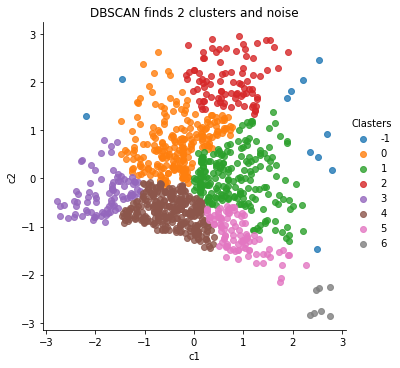

In [34]:
sns.lmplot('c1', 'c2', data=data_pca, fit_reg=False, hue = 'Clasters' )
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

### Klasteryzacja KMeans na pliku data_dummies, bez PCA

In [35]:
data_dummies1 = pd.read_csv('data_dummies.csv')
data_dummies1.drop(['loan_status', 'Unnamed: 0'], axis=1, inplace=True)
data_dummies1

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,1,10.65,162.87,1,10,24000.0,2011,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2,15.27,59.83,2,1,30000.0,2011,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,1,15.96,84.33,3,10,12252.0,2011,8.72,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,1,13.49,339.31,4,10,49200.0,2011,20.00,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,2,12.69,67.79,5,1,80000.0,2011,17.94,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,3500.0,1,10.28,113.39,4,1,180000.0,2007,10.00,...,0,0,0,0,0,0,0,0,0,0
42531,1000.0,1000.0,1,9.64,32.11,14,1,12000.0,2007,10.00,...,0,0,0,0,0,0,0,0,0,0
42532,2525.0,2525.0,1,9.33,80.69,13,1,110000.0,2007,10.00,...,0,0,0,0,0,0,0,0,0,0
42533,6500.0,6500.0,1,8.38,204.84,18,1,60000.0,2007,4.00,...,0,0,0,0,0,0,0,0,0,0


In [36]:
scaler = StandardScaler()
scaler.fit(data_dummies1)
data_dummies1_std = scaler.transform(data_dummies1)

In [37]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(data_dummies1)

KMeans(max_iter=1000, n_clusters=5)

In [38]:
kmeans.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

### Sprawdzamy dwie metody, ile klastrów powinniśmy zastosować

#### Metoda łokcia

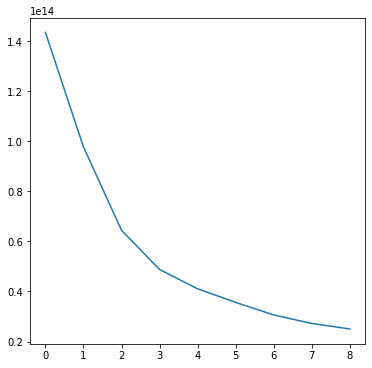

In [39]:
plt.figure(figsize = (6, 6))
ssd = [] 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(data_dummies1)
    
    ssd.append(kmeans.inertia_) 
    
plt.plot(ssd)

#### Miara wewnętrzna - wskaźnik sylwetkowy

In [40]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(data_dummies1)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(data_dummies1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6588343799502001
For n_clusters=3, the silhouette score is 0.642437382610893
For n_clusters=4, the silhouette score is 0.5745884037476563
For n_clusters=5, the silhouette score is 0.47399062530897446
For n_clusters=6, the silhouette score is 0.40665946218163784
For n_clusters=7, the silhouette score is 0.39109244947253297
For n_clusters=8, the silhouette score is 0.38847823683736543
For n_clusters=9, the silhouette score is 0.3513368341311928
For n_clusters=10, the silhouette score is 0.35441672612612685


#### W pobliżu k=7 się praktycznie stabilizuje, zaczyna się wypłaszczać przy k=4. Przyjmuję poniżej k=4

In [41]:
kmeans = KMeans(n_clusters = 4, max_iter=1000, random_state=42)
kmeans.fit(data_dummies1)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [42]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [43]:
data_dummies1['K-Means_Cluster_ID'] = kmeans.labels_

In [44]:
data_dummies1.sample(20)

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,K-Means_Cluster_ID
38146,20000.0,20000.0,1,11.78,662.19,4,7,82726.0,2008,0.22,...,0,0,0,0,0,0,0,0,0,1
2074,7750.0,7750.0,1,7.51,241.11,17,10,90000.0,2011,8.69,...,0,0,0,0,0,0,0,0,0,1
9041,4500.0,4500.0,1,5.42,135.72,12,1,67000.0,2011,5.39,...,0,0,0,0,0,0,0,0,0,1
15669,6400.0,6400.0,2,6.00,132.64,25,2,75000.0,2011,19.98,...,0,0,0,0,0,0,0,0,0,1
35612,20000.0,20000.0,1,17.04,713.49,25,9,186462.0,2009,12.50,...,0,0,0,0,0,0,0,0,0,0
11276,3575.0,3575.0,1,11.49,117.88,14,1,50000.0,2011,23.40,...,0,0,0,0,0,0,0,0,0,1
18563,19200.0,19200.0,2,15.28,459.60,22,10,82992.0,2011,18.00,...,0,0,0,0,0,1,0,0,0,1
11954,18500.0,18500.0,1,12.99,623.25,4,10,60000.0,2011,7.96,...,0,0,0,0,0,0,0,0,0,1
6068,5500.0,5500.0,1,13.49,186.62,4,1,70000.0,2011,1.34,...,0,0,0,0,0,0,0,0,0,1
37358,5500.0,5500.0,1,7.68,171.55,20,4,70000.0,2009,10.32,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

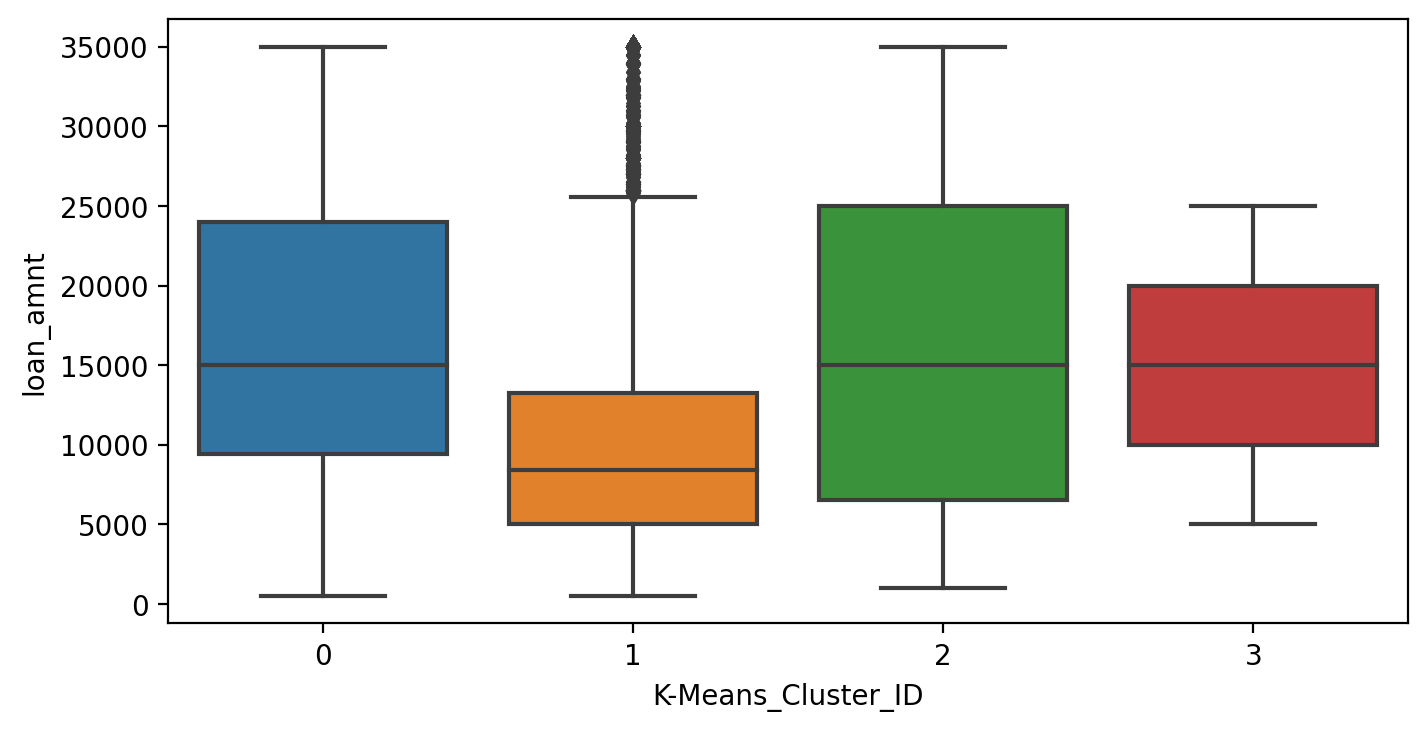

In [45]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=data_dummies1)

### Wniosek:
W klastrze nr 2 jest najwięcej pożyczek od 7,5 tys do 25 tys. Niższe pozyczki są w klastrze 1. 

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='int_rate'>

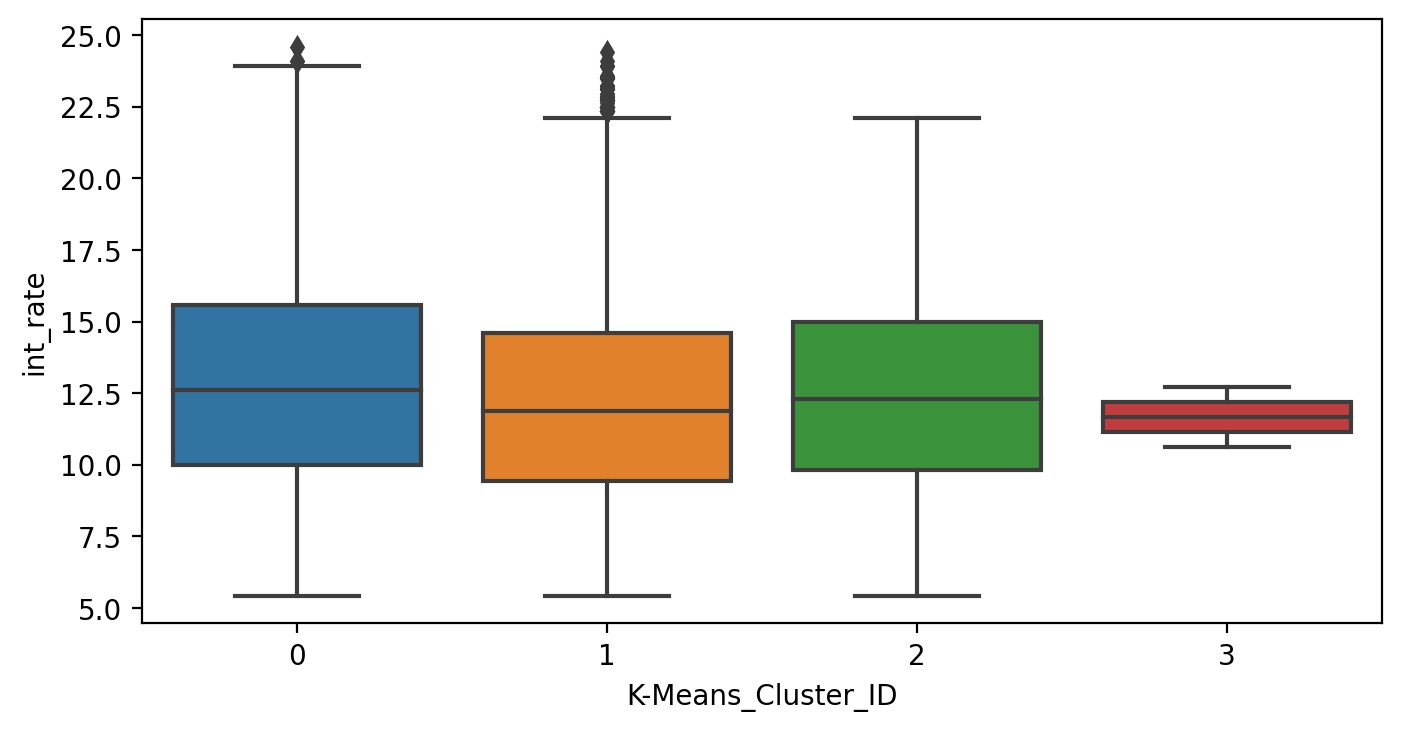

In [46]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='int_rate', data=data_dummies1)

### Wnioski:
W tym wypadku własciwie klastry się #zawierają w sobie" co do wysokości oprocentowania.

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='emp_length'>

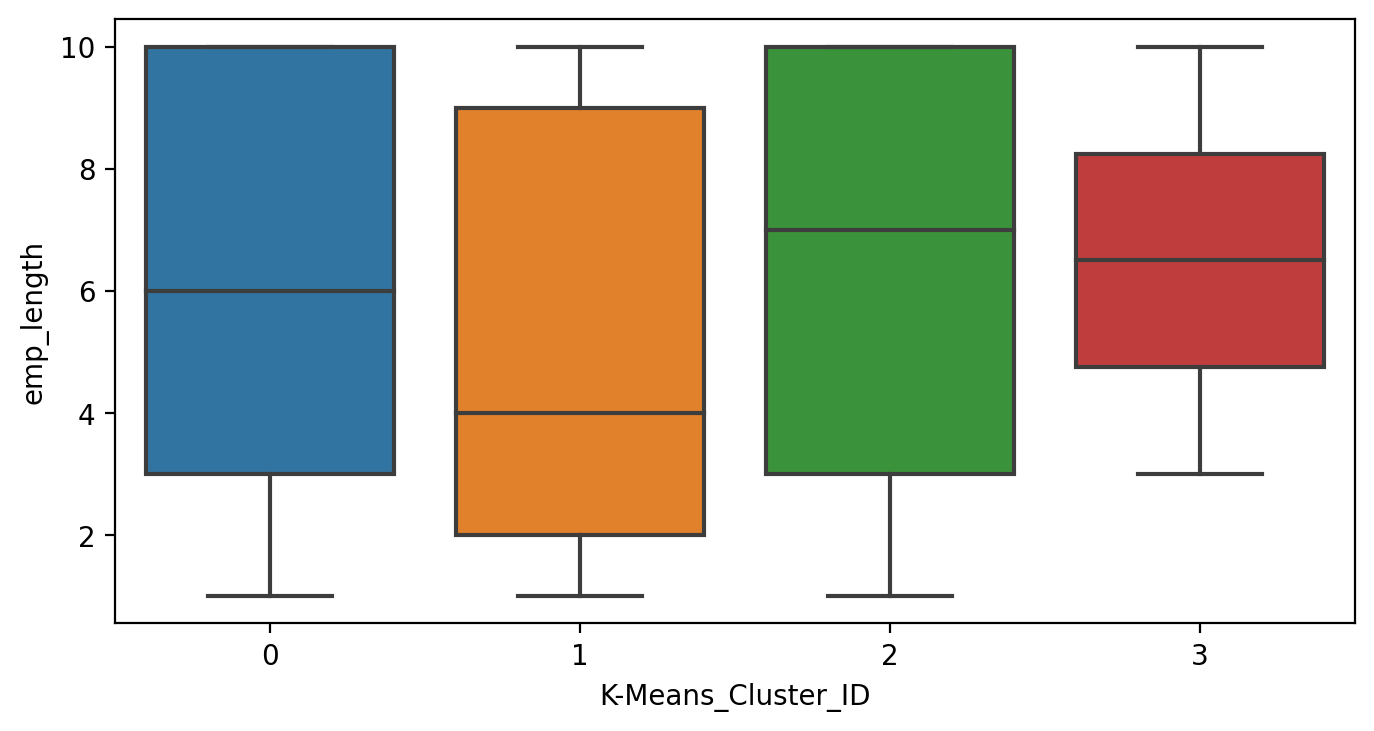

In [47]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=data_dummies1)

### Wnioski:
Grupa pożyzckobiorców 5-9 lat została wrzucona do wszystkich klastrów, ale już ci z najniższym stażem pracy są w klastrze 1. 

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

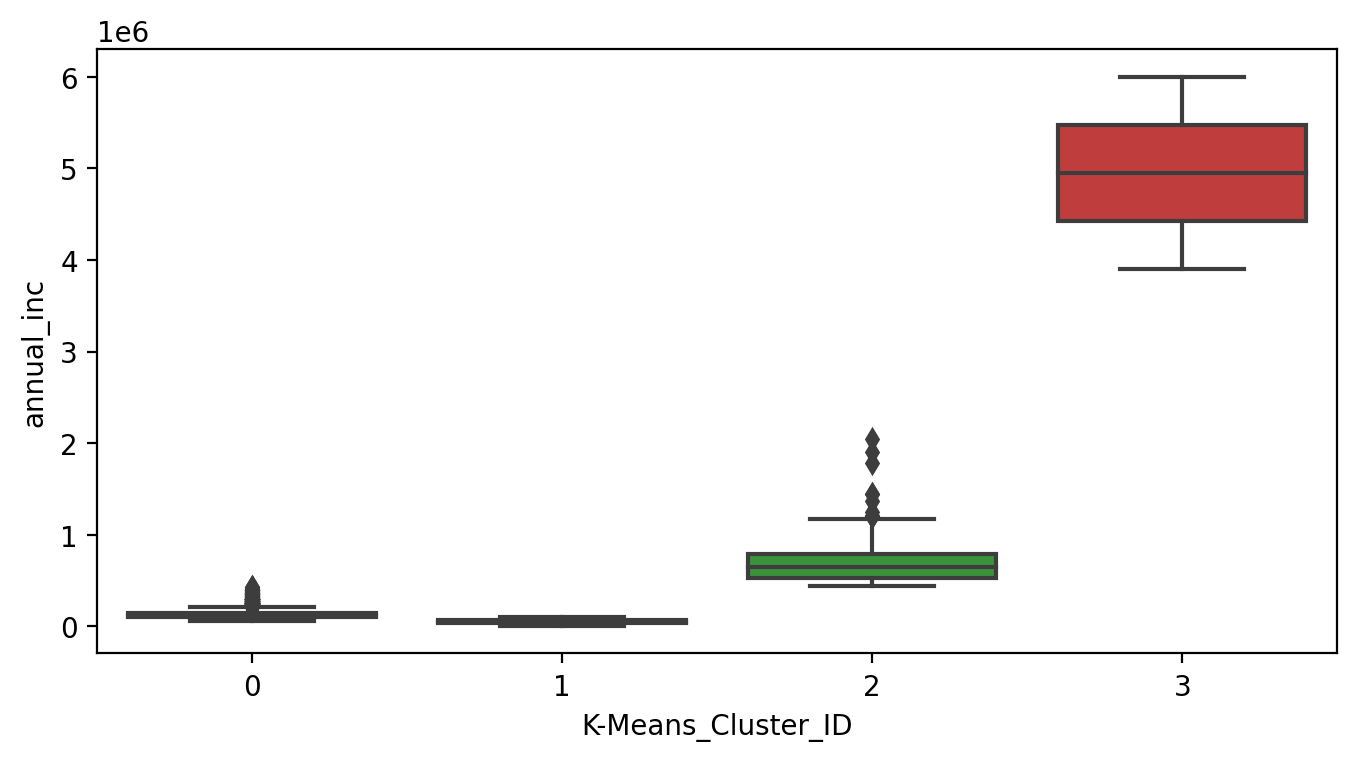

In [48]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=data_dummies1)

### Wnioski:
Pożyczkobiorcy z najwyższym dochodem zostali wrzuceni do grupy 3. 

### Kolejna część w pliku "Modelowanie III część Projekt końcowy Data Science - Dorota Gawrońska-Popa"

### Łódź 4.10.2020